# VAE with S-curve dataset

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve

import torch

from model.vae import VAE

plt.style.use("seaborn-darkgrid")

# Data

## Sample

In [2]:
n_dim = 5000

x, t = make_s_curve(n_dim, random_state=0)
x = torch.tensor(x, dtype=torch.float32)

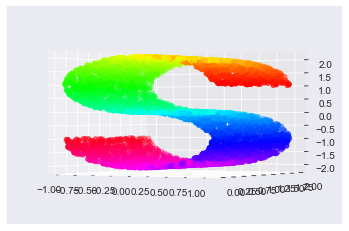

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x.numpy()[:, 0], x.numpy()[:, 1], zs=x.numpy()[:, 2],
           c=t, cmap=plt.get_cmap("hsv"))
ax.view_init(elev=0, azim=-60)
plt.show()

# Model

In [4]:
x_dim = 3
z_dim = 2
h_dim = 200

vae = VAE(x_dim, z_dim, h_dim)

In [5]:
n_epochs = 1000
for epoch in range(n_epochs):
    loss = vae.train({"x": x})
    if (epoch + 1) % (n_epochs // 10) == 0:
        print(loss)

tensor(3.6988, grad_fn=<MeanBackward0>)
tensor(3.6993, grad_fn=<MeanBackward0>)
tensor(3.6963, grad_fn=<MeanBackward0>)
tensor(3.3527, grad_fn=<MeanBackward0>)
tensor(3.2315, grad_fn=<MeanBackward0>)
tensor(3.1570, grad_fn=<MeanBackward0>)
tensor(3.1703, grad_fn=<MeanBackward0>)
tensor(3.1275, grad_fn=<MeanBackward0>)
tensor(2.9075, grad_fn=<MeanBackward0>)
tensor(2.6460, grad_fn=<MeanBackward0>)


In [10]:
# Reconstruction
recon = vae.reconstruction(x, return_all=True)

# Sample from latent
sample = vae.sample(300, return_all=True)

# Plot

## Latent

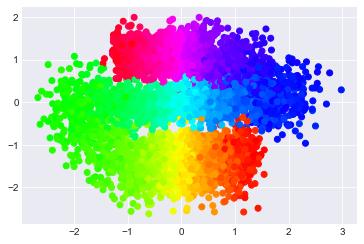

In [11]:
data = recon["z"]

plt.figure()
plt.scatter(data.numpy()[:, 0], data.numpy()[:, 1],
            c=t, cmap=plt.get_cmap("hsv"))
plt.show()

## Reconstruction

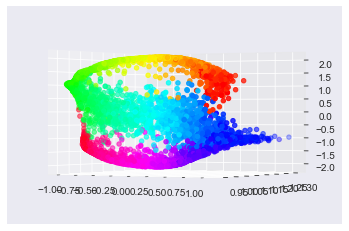

In [12]:
data = recon["x"]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data.numpy()[:, 0], data.numpy()[:, 1], zs=data.numpy()[:, 2],
           c=t, cmap=plt.get_cmap("hsv"))
ax.view_init(elev=0, azim=-60)
plt.show()

## Sample from latent

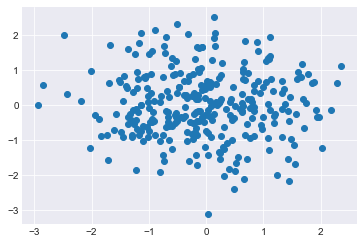

In [13]:
data = sample["z"]

plt.figure()
plt.scatter(data.numpy()[:, 0], data.numpy()[:, 1],
            cmap=plt.get_cmap("hsv"))
plt.show()

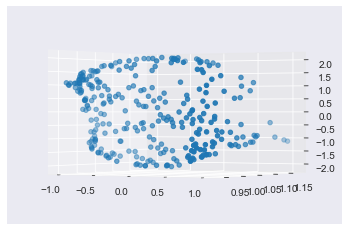

In [14]:
data = sample["x"]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data.numpy()[:, 0], data.numpy()[:, 1], zs=data.numpy()[:, 2])
ax.view_init(elev=0, azim=-60)
plt.show()